Nikhil Rajendra Dhumal 

21102A0009 

CMPN A

[Github](https://github.com/nikhil-dhumal/ML_Practicals/blob/main/lab_ps_7.ipynb)

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering
from sklearn.metrics import pairwise_distances
from scipy.sparse import csgraph
import tarfile

## Social Network Dataset (Facebook)

In [2]:
def extract_tarfile(tar_file):
    with tarfile.open(tar_file, "r:gz") as tar:
        tar.extractall()

In [3]:
extract_tarfile('datasets/facebook.tar.gz')

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_23516\2046909325.py:3: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  tar.extractall()


In [4]:
import numpy as np
import networkx as nx
from sklearn.cluster import SpectralClustering
import matplotlib.pyplot as plt

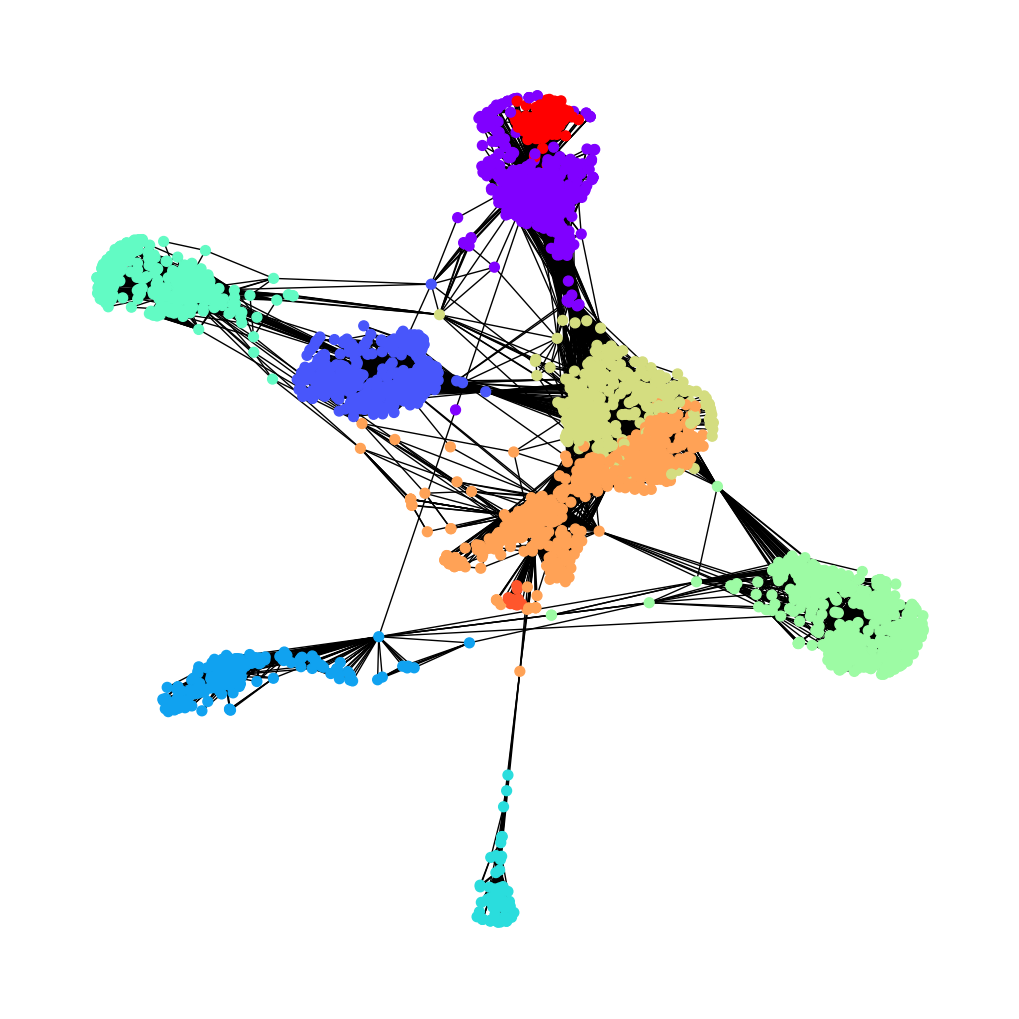

In [5]:
graph_file = 'datasets/facebook_combined.txt'

G = nx.read_edgelist(graph_file, nodetype=int)

adj_matrix = nx.to_numpy_array(G)

num_clusters = 10
spectral_clustering = SpectralClustering(n_clusters=num_clusters, affinity='precomputed', random_state=42)
labels = spectral_clustering.fit_predict(adj_matrix)

plt.figure(figsize=(10, 10))
nx.draw(G, node_color=labels, with_labels=False, node_size=50, cmap=plt.cm.rainbow)
plt.show()

np.savetxt("spectral_clustering_labels.txt", labels, fmt='%d')

In [6]:
import os
import glob
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering
import community as community_louvain

c:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


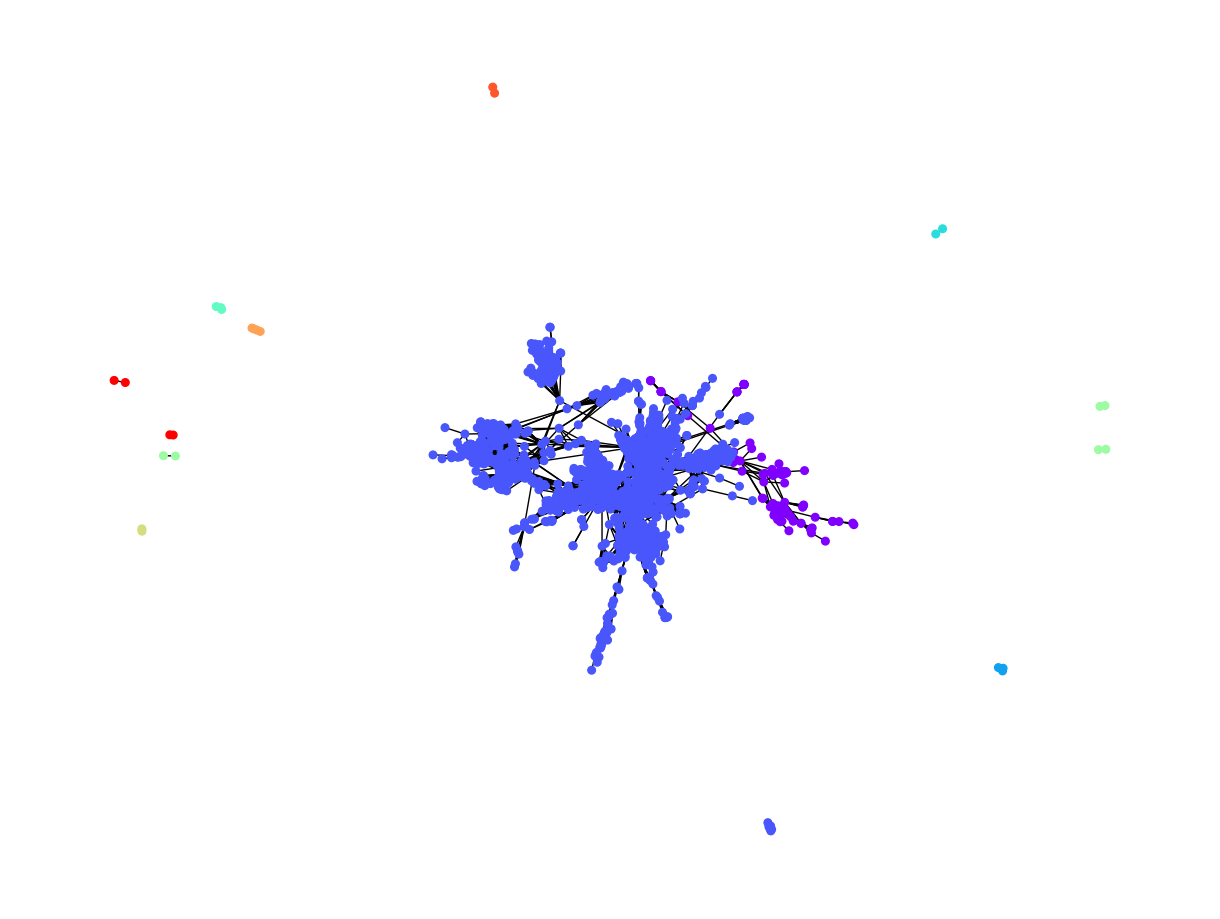

In [8]:
def load_edges_from_multiple_files(files):
    edges = []
    for file in files:
        with open(file, 'r') as f:
            for line in f:
                node_ids = list(map(int, line.strip().split()))
                src = node_ids[0]
                for dst in node_ids[1:]:
                    edges.append((src, dst))
    return edges

edge_files = glob.glob('datasets/facebook/*.edges')

edges = load_edges_from_multiple_files(edge_files)

G = nx.Graph()
G.add_edges_from(edges)

adj_matrix = nx.to_numpy_array(G)

num_clusters = 10
spectral_clustering = SpectralClustering(n_clusters=num_clusters, affinity='precomputed', random_state=42)
labels = spectral_clustering.fit_predict(adj_matrix)

plt.figure(figsize=(12, 9))
nx.draw(G, node_color=labels, with_labels=False, node_size=30, cmap=plt.cm.rainbow)
plt.show()

## Enron Email Dataset

In [10]:
extract_tarfile('datasets/enron_mail_20150507.tar.gz')

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_23516\2046909325.py:3: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  tar.extractall()


In [1]:
import os
import networkx as nx
from sklearn.cluster import SpectralClustering
import matplotlib.pyplot as plt
from email.parser import Parser
import numpy as np

In [31]:
def parse_emails(folder_path):
    email_files = []
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            file_path = os.path.join(root, file)
            with open(file_path, 'r', errors='ignore') as f:
                email_files.append(f.read())
    return email_files

In [25]:
def extract_communications(employee_dir):
    inbox_emails = parse_emails(os.path.join(employee_dir, 'inbox'))
    sent_emails = parse_emails(os.path.join(employee_dir, 'sent'))

    inbox_senders = []
    sent_receivers = []

    email_parser = Parser()

    for email in inbox_emails:
        parsed_email = email_parser.parsestr(email)
        if parsed_email['From']:
            inbox_senders.append(parsed_email['From'])

    for email in sent_emails:
        parsed_email = email_parser.parsestr(email)
        if parsed_email['To']:
            sent_receivers.append(parsed_email['To'])

    return inbox_senders, sent_receivers

In [22]:
def build_communication_graph(base_dir, sample_size=None):
    G = nx.Graph()

    employees = os.listdir(base_dir)

    if sample_size:
        employees = np.random.choice(employees, size=sample_size, replace=False)

    for employee in employees:
        employee_dir = os.path.join(base_dir, employee)
        if os.path.isdir(employee_dir):
            inbox_senders, sent_receivers = extract_communications(employee_dir)

            for sender in inbox_senders:
                G.add_edge(sender, employee)

            for receiver in sent_receivers:
                G.add_edge(employee, receiver)

    return G

In [33]:
base_dir = "datasets/maildir"

sample_size = 20
G = build_communication_graph(base_dir, sample_size)

adj_matrix = nx.to_numpy_array(G)

n_clusters = 20
sc = SpectralClustering(n_clusters=n_clusters, affinity='precomputed', random_state=42)
labels = sc.fit_predict(adj_matrix)

pos = nx.spring_layout(G)

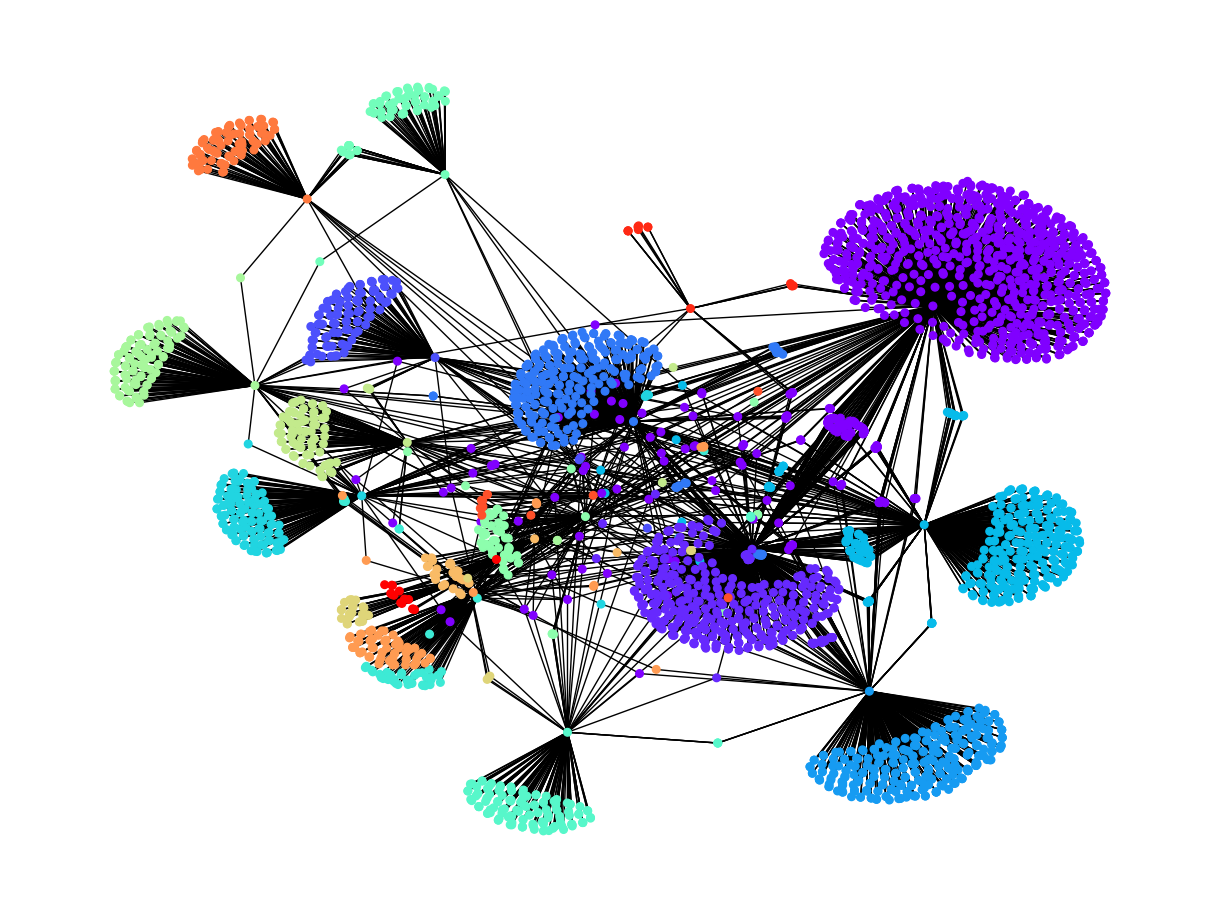

In [34]:
plt.figure(figsize=(12, 9))
nx.draw(G, pos, node_color=labels, with_labels=False, node_size=30, cmap=plt.cm.rainbow)
plt.show()